In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True) 
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [2]:
df=pd.read_csv("aud_usd_h4_mapNmerged_.csv")
df.columns = df.columns.str.replace('.','_')

In [3]:
df.shape

(14028, 758)

In [4]:
df=df.dropna(how='all',axis=1)
df.shape

(14028, 756)

In [5]:
df.head()

start_time_local_            end_time_local_  bid_open  bid_high  \
0  2010-01-05 18:00:00+00:00  2010-01-05 22:00:00+00:00    0.9132    0.9153   
1  2010-01-05 22:00:00+00:00  2010-01-06 02:00:00+00:00    0.9123    0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 06:00:00+00:00    0.9114    0.9138   
3  2010-01-06 06:00:00+00:00  2010-01-06 10:00:00+00:00    0.9134    0.9143   
4  2010-01-06 10:00:00+00:00  2010-01-06 14:00:00+00:00    0.9140    0.9151   

   bid_low  bid_close  PC2_AUD_H4  PC7_AUD_H4  PC14_AUD_H4  PC20_AUD_H4  \
0   0.9110     0.9124       -0.31        0.50         1.72          0.0   
1   0.9090     0.9117       -0.16       -0.03         1.64          0.0   
2   0.9102     0.9135        0.12        0.13         1.84          0.0   
3   0.9123     0.9142        0.27        0.14         1.76          0.0   
4   0.9097     0.9142        0.08       -0.01         2.13          0.0   

   PC50_AUD_H4  STDEV_AUD_H4_1p  STDEV_AUD_H4_2p  STDEV_AUD_H4_4p  \
0          0.0           0.0004           0.0012           0.0010   
1          0.0           0.0004           0.0006           0.0013   
2          0.0           0.0009           0.0007           0.0012   
3          0.0           0.0004           0.0011           0.0009   
4          0.0           0.0000           0.0003           0.0010   

   STDEV_AUD_H4_7p  STDEV_AUD_H4_10p  STDEV_AUD_H4_14p  STDEV_AUD_H4_20p  \
0           0.0020            0.0065            0.0076               0.0   
1           0.0011            0.0049            0.0073               0.0   
2           0.0011            0.0027            0.0070               0.0   
3           0.0011            0.0018            0.0065               0.0   
4           0.0011            0.0011            0.0059               0.0   

   CS_AUD_CAD_H4_7  correl_AUD_CAD_7p  CS_AUD_CAD_H4_10  correl_AUD_CAD_10p  \
0            0.706             -0.540               NaN                 NaN   
1            0.848             -0.546               NaN                 NaN   
2            0.894             -0.510               NaN                 NaN   
3            0.915             -0.466               NaN                 NaN   
4            0.932             -0.562               NaN                 NaN   

   CS_AUD_CAD_H4_20  correl_AUD_CAD_20p  CS_AUD_CHF_H4_7  correl_AUD_CHF_7p  \
0               NaN                 NaN            0.937             -0.538   
1               NaN                 NaN            0.878             -0.657   
2               NaN                 NaN            0.849             -0.627   
3               NaN                 NaN            0.787             -0.433   
4               NaN                 NaN            0.690             -0.481   

   CS_AUD_CHF_H4_10  correl_AUD_CHF_10p  CS_AUD_CHF_H4_20  correl_AUD_CHF_20p  \
0               NaN                 NaN               NaN                 NaN   
1               NaN                 NaN               NaN                 NaN   
2               NaN                 NaN               NaN                 NaN   
3               NaN                 NaN               NaN                 NaN   
4               NaN                 NaN               NaN                 NaN   

   CS_AUD_GBP_H4_7  correl_AUD_GBP_7p  CS_AUD_GBP_H4_10  correl_AUD_GBP_10p  \
0           -0.571             -0.495               NaN                 NaN   
1           -0.735              0.273               NaN                 NaN   
2           -0.727              0.409               NaN                 NaN   
3           -0.719              0.337               NaN                 NaN   
4           -0.644              0.421               NaN                 NaN   

   CS_AUD_GBP_H4_20  correl_AUD_GBP_20p  CS_AUD_JPY_H4_7  correl_AUD_JPY_7p  \
0               NaN                 NaN           -0.423             -0.628   
1               NaN                 NaN           -0.606             -0.307   
2               NaN                 NaN           -0.469        

In [6]:
list(df.columns)

['start_time_local_',
 'end_time_local_',
 'bid_open',
 'bid_high',
 'bid_low',
 'bid_close',
 'PC2_AUD_H4',
 'PC7_AUD_H4',
 'PC14_AUD_H4',
 'PC20_AUD_H4',
 'PC50_AUD_H4',
 'STDEV_AUD_H4_1p',
 'STDEV_AUD_H4_2p',
 'STDEV_AUD_H4_4p',
 'STDEV_AUD_H4_7p',
 'STDEV_AUD_H4_10p',
 'STDEV_AUD_H4_14p',
 'STDEV_AUD_H4_20p',
 'CS_AUD_CAD_H4_7',
 'correl_AUD_CAD_7p',
 'CS_AUD_CAD_H4_10',
 'correl_AUD_CAD_10p',
 'CS_AUD_CAD_H4_20',
 'correl_AUD_CAD_20p',
 'CS_AUD_CHF_H4_7',
 'correl_AUD_CHF_7p',
 'CS_AUD_CHF_H4_10',
 'correl_AUD_CHF_10p',
 'CS_AUD_CHF_H4_20',
 'correl_AUD_CHF_20p',
 'CS_AUD_GBP_H4_7',
 'correl_AUD_GBP_7p',
 'CS_AUD_GBP_H4_10',
 'correl_AUD_GBP_10p',
 'CS_AUD_GBP_H4_20',
 'correl_AUD_GBP_20p',
 'CS_AUD_JPY_H4_7',
 'correl_AUD_JPY_7p',
 'CS_AUD_JPY_H4_10',
 'correl_AUD_JPY_10p',
 'CS_AUD_JPY_H4_20',
 'correl_AUD_JPY_20p',
 'CS_EUR_AUD_H4_7',
 'correl_EUR_AUD_7p',
 'CS_EUR_AUD_H4_10',
 'correl_EUR_AUD_10p',
 'CS_EUR_AUD_H4_20',
 'correl_EUR_AUD_20p',
 'target1',
 'target2',
 'target3',

In [7]:
df_2=df[['start_time_local_h1_1',
 'end_time_local_h1_1',
 'open_h1_1',
 'high_h1_1',
 'low_h1_1',
 'close_h1_1',
 'PC1_AUD_H1_h1_1',
 'PC2_AUD_H1_h1_1',
 'PC3_AUD_H1_h1_1',
 'STDEV_AUD_H1_2p_h1_1',
 'STDEV_AUD_H1_3p_h1_1',
 'correl_AUD_CAD_2p_h1_1',
 'correl_AUD_CAD_3p_h1_1',
 'correl_AUD_JPY_2p_h1_1',
 'correl_AUD_JPY_3p_h1_1',
 'correl_AUD_GBP_2p_h1_1',
 'correl_AUD_GBP_3p_h1_1',
 'correl_AUD_EUR_2p_h1_1',
 'correl_AUD_EUR_3p_h1_1',
 'correl_AUD_CHF_2p_h1_1',
 'correl_AUD_CHF_3p_h1_1',
 'CS_AUD_CAD_H1_2_h1_1',
 'CS_AUD_CAD_H1_3_h1_1',
 'CS_AUD_JPY_H1_2_h1_1',
 'CS_AUD_JPY_H1_3_h1_1',
 'CS_AUD_GBP_H1_2_h1_1',
 'CS_AUD_GBP_H1_3_h1_1',
 'CS_AUD_EUR_H1_2_h1_1',
 'CS_AUD_EUR_H1_3_h1_1',
 'CS_AUD_CHF_H1_2_h1_1',
 'CS_AUD_CHF_H1_3_h1_1',
 'start_time_local_h1_2',
 'end_time_local_h1_2',
 'open_h1_2',
 'high_h1_2',
 'low_h1_2',
 'close_h1_2',
 'PC1_AUD_H1_h1_2',
 'PC2_AUD_H1_h1_2',
 'PC3_AUD_H1_h1_2',
 'STDEV_AUD_H1_2p_h1_2',
 'STDEV_AUD_H1_3p_h1_2',
 'correl_AUD_CAD_2p_h1_2',
 'correl_AUD_CAD_3p_h1_2',
 'correl_AUD_JPY_2p_h1_2',
 'correl_AUD_JPY_3p_h1_2',
 'correl_AUD_GBP_2p_h1_2',
 'correl_AUD_GBP_3p_h1_2',
 'correl_AUD_EUR_2p_h1_2',
 'correl_AUD_EUR_3p_h1_2',
 'correl_AUD_CHF_2p_h1_2',
 'correl_AUD_CHF_3p_h1_2',
 'CS_AUD_CAD_H1_2_h1_2',
 'CS_AUD_CAD_H1_3_h1_2',
 'CS_AUD_JPY_H1_2_h1_2',
 'CS_AUD_JPY_H1_3_h1_2',
 'CS_AUD_GBP_H1_2_h1_2',
 'CS_AUD_GBP_H1_3_h1_2',
 'CS_AUD_EUR_H1_2_h1_2',
 'CS_AUD_EUR_H1_3_h1_2',
 'CS_AUD_CHF_H1_2_h1_2',
 'CS_AUD_CHF_H1_3_h1_2',
 'start_time_local_h1_3',
 'end_time_local_h1_3',
 'open_h1_2_1',
 'high_h1_2_1',
 'low_h1_2_1',
 'close_h1_2_1',
 'PC1_AUD_H1_h1_2_1',
 'PC2_AUD_H1_h1_2_1',
 'PC3_AUD_H1_h1_2_1',
 'STDEV_AUD_H1_2p_h1_2_1',
 'STDEV_AUD_H1_3p_h1_2_1',
 'correl_AUD_CAD_2p_h1_2_1',
 'correl_AUD_CAD_3p_h1_2_1',
 'correl_AUD_JPY_2p_h1_2_1',
 'correl_AUD_JPY_3p_h1_2_1',
 'correl_AUD_GBP_2p_h1_2_1',
 'correl_AUD_GBP_3p_h1_2_1',
 'correl_AUD_EUR_2p_h1_2_1',
 'correl_AUD_EUR_3p_h1_2_1',
 'correl_AUD_CHF_2p_h1_2_1',
 'correl_AUD_CHF_3p_h1_2_1',
 'CS_AUD_CAD_H1_2_h1_2_1',
 'CS_AUD_CAD_H1_3_h1_2_1',
 'CS_AUD_JPY_H1_2_h1_2_1',
 'CS_AUD_JPY_H1_3_h1_2_1',
 'CS_AUD_GBP_H1_2_h1_2_1',
 'CS_AUD_GBP_H1_3_h1_2_1',
 'CS_AUD_EUR_H1_2_h1_2_1',
 'CS_AUD_EUR_H1_3_h1_2_1',
 'CS_AUD_CHF_H1_2_h1_2_1',
 'CS_AUD_CHF_H1_3_h1_2_1',
 'start_time_local_h1_4',
 'end_time_local_h1_4',
 'open_h1_4',
 'high_h1_4',
 'low_h1_4',
 'close_h1_4',
 'PC1_AUD_H1_h1_4',
 'PC2_AUD_H1_h1_4',
 'PC3_AUD_H1_h1_4',
 'STDEV_AUD_H1_2p_h1_4',
 'STDEV_AUD_H1_3p_h1_4',
 'correl_AUD_CAD_2p_h1_4',
 'correl_AUD_CAD_3p_h1_4',
 'correl_AUD_JPY_2p_h1_4',
 'correl_AUD_JPY_3p_h1_4',
 'correl_AUD_GBP_2p_h1_4',
 'correl_AUD_GBP_3p_h1_4',
 'correl_AUD_EUR_2p_h1_4',
 'correl_AUD_EUR_3p_h1_4',
 'correl_AUD_CHF_2p_h1_4',
 'correl_AUD_CHF_3p_h1_4',
 'CS_AUD_CAD_H1_2_h1_4',
 'CS_AUD_CAD_H1_3_h1_4',
 'CS_AUD_JPY_H1_2_h1_4',
 'CS_AUD_JPY_H1_3_h1_4',
 'CS_AUD_GBP_H1_2_h1_4',
 'CS_AUD_GBP_H1_3_h1_4',
 'CS_AUD_EUR_H1_2_h1_4',
 'CS_AUD_EUR_H1_3_h1_4',
 'CS_AUD_CHF_H1_2_h1_4',
 'CS_AUD_CHF_H1_3_h1_4',
 'start_time_local_h1_5',
 'end_time_local_h1_5',
 'open_h1_5',
 'high_h1_5',
 'low_h1_5',
 'close_h1_5',
 'PC1_AUD_H1_h1_5',
 'PC2_AUD_H1_h1_5',
 'PC3_AUD_H1_h1_5',
 'STDEV_AUD_H1_2p_h1_5',
 'STDEV_AUD_H1_3p_h1_5',
 'correl_AUD_CAD_2p_h1_5',
 'correl_AUD_CAD_3p_h1_5',
 'correl_AUD_JPY_2p_h1_5',
 'correl_AUD_JPY_3p_h1_5',
 'correl_AUD_GBP_2p_h1_5',
 'correl_AUD_GBP_3p_h1_5',
 'correl_AUD_EUR_2p_h1_5',
 'correl_AUD_EUR_3p_h1_5',
 'correl_AUD_CHF_2p_h1_5',
 'correl_AUD_CHF_3p_h1_5',
 'CS_AUD_CAD_H1_2_h1_5',
 'CS_AUD_CAD_H1_3_h1_5',
 'CS_AUD_JPY_H1_2_h1_5',
 'CS_AUD_JPY_H1_3_h1_5',
 'CS_AUD_GBP_H1_2_h1_5',
 'CS_AUD_GBP_H1_3_h1_5',
 'CS_AUD_EUR_H1_2_h1_5',
 'CS_AUD_EUR_H1_3_h1_5',
 'CS_AUD_CHF_H1_2_h1_5',
 'CS_AUD_CHF_H1_3_h1_5',
]]

In [8]:
df_2.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0  2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1  2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3  2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4  2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local

In [9]:
df_old=pd.read_csv("forex_dataframe_new.csv")

In [10]:
df_old.head()

time_local start_time_local  end_time_local  bid_open  \
0  2010-01-05 18:00:00+00:00   1/5/2010 18:00  1/5/2010 22:00    0.9132   
1  2010-01-05 22:00:00+00:00   1/5/2010 22:00   1/6/2010 2:00    0.9123   
2  2010-01-06 02:00:00+00:00    1/6/2010 2:00   1/6/2010 6:00    0.9114   
3  2010-01-06 06:00:00+00:00    1/6/2010 6:00  1/6/2010 10:00    0.9134   
4  2010-01-06 10:00:00+00:00   1/6/2010 10:00  1/6/2010 14:00    0.9140   

   bid_high  bid_low  bid_close  PC2_AUD_H4  PC7_AUD_H4  PC14_AUD_H4  \
0    0.9153   0.9110     0.9124       -0.31        0.50         1.72   
1    0.9126   0.9090     0.9117       -0.16       -0.03         1.64   
2    0.9138   0.9102     0.9135        0.12        0.13         1.84   
3    0.9143   0.9123     0.9142        0.27        0.14         1.76   
4    0.9151   0.9097     0.9142        0.08       -0.01         2.13   

   PC20_AUD_H4  PC50_AUD_H4  STDEV_AUD_H4_1p  STDEV_AUD_H4_2p  \
0          0.0          0.0           0.0004           0.0012   
1          0.0          0.0           0.0004           0.0006   
2          0.0          0.0           0.0009           0.0007   
3          0.0          0.0           0.0004           0.0011   
4          0.0          0.0           0.0000           0.0003   

   STDEV_AUD_H4_4p  STDEV_AUD_H4_7p  STDEV_AUD_H4_10p  STDEV_AUD_H4_14p  \
0           0.0010           0.0020            0.0065            0.0076   
1           0.0013           0.0011            0.0049            0.0073   
2           0.0012           0.0011            0.0027            0.0070   
3           0.0009           0.0011            0.0018            0.0065   
4           0.0010           0.0011            0.0011            0.0059   

   STDEV_AUD_H4_20p  CS_AUD_CAD_H4_7  correl_AUD_CAD_7p  CS_AUD_CAD_H4_10  \
0               0.0            0.706             -0.540               NaN   
1               0.0            0.848             -0.546               NaN   
2               0.0            0.894             -0.510               NaN   
3               0.0            0.915             -0.466               NaN   
4               0.0            0.932             -0.562               NaN   

   correl_AUD_CAD_10p  CS_AUD_CAD_H4_20  correl_AUD_CAD_20p  CS_AUD_CHF_H4_7  \
0                 NaN               NaN                 NaN            0.937   
1                 NaN               NaN                 NaN            0.878   
2                 NaN               NaN                 NaN            0.849   
3                 NaN               NaN                 NaN            0.787   
4                 NaN               NaN                 NaN            0.690   

   correl_AUD_CHF_7p  CS_AUD_CHF_H4_10  correl_AUD_CHF_10p  CS_AUD_CHF_H4_20  \
0             -0.538               NaN                 NaN               NaN   
1             -0.657               NaN                 NaN               NaN   
2             -0.627               NaN                 NaN               NaN   
3             -0.433               NaN                 NaN               NaN   
4             -0.481               NaN                 NaN               NaN   

   correl_AUD_CHF_20p  CS_AUD_GBP_H4_7  correl_AUD_GBP_7p  CS_AUD_GBP_H4_10  \
0                 NaN           -0.571             -0.495               NaN   
1                 NaN           -0.735              0.273               NaN   
2                 NaN           -0.727              0.409               NaN   
3                 NaN           -0.719              0.337               NaN   
4                 NaN           -0.644              0.421               NaN   

   correl_AUD_GBP_10p  CS_AUD_GBP_H4_20  correl_AUD_GBP_20p  CS_AUD_JPY_H4_7  \
0                 NaN               NaN                 NaN           -0.423   
1                 NaN               NaN                 NaN           -0.606   
2                 NaN               NaN                 NaN           -0.469   
3                 NaN               NaN                 NaN            0

In [11]:
df_merged=pd.merge(df_2, df_old,how='inner',right_on='time_local',left_on='start_time_local_h1_1')

In [12]:
[df_2.shape,df_old.shape]

[(14028, 155), (15269, 542)]

In [13]:
df_merged.shape

(14028, 697)

In [14]:
macro_economic_data=pd.read_excel(r"2007 to Jan 2019 Macro Economic Data.xlsx")
macro_economic_data_AUD=macro_economic_data[(macro_economic_data['Currency']=='AUD') ]
macro_economic_data_AUD['DateTime (GMT)']=macro_economic_data_AUD['DateTime (GMT)']+timedelta(hours=4)
macro_economic_data_AUD['Date']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).date
#macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous'] 

In [15]:
macro_economic_data_AUD['hour']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).hour

In [16]:
def hour_extract(hour):
        if(hour<=2):
            return 2
        elif (hour>2 and hour<=6):
            return 6
        elif (hour>6 and hour<=10):
            return 10
        elif (hour>10 and hour<=14):
            return 14
        elif (hour>14 and hour<=18):
            return 18
        elif (hour>18 and hour<=22):
            return 22
        else:
            return 2
            

macro_economic_data_AUD['H4_hour']=macro_economic_data_AUD['hour'].apply(hour_extract)

In [17]:
macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous']  
macro_mean_AUD_Summary=macro_economic_data_AUD.groupby(['Date','H4_hour','Name'])['PC_macro_economic_ind','Volatility'].mean().reset_index()

In [18]:
macro_mean_AUD_Summary.fillna(0,inplace=True)
macro_mean_AUD_Summary['Datetime']=pd.to_datetime(macro_mean_AUD_Summary.Date) + macro_mean_AUD_Summary.H4_hour.astype('timedelta64[h]')

In [19]:
df1=macro_mean_AUD_Summary.pivot(index='Datetime', columns='Name', values='PC_macro_economic_ind').reset_index()
df1.columns = [str(col) + '_PC' for col in df1.columns]
df1.rename(columns={'Datetime_PC':'Datetime'}, inplace=True)
df1.head()


df2=macro_mean_AUD_Summary.pivot(index='Datetime', columns='Name', values='Volatility').reset_index()
df2.columns = [str(col) + '_VOL' for col in df2.columns]
df2.rename(columns={'Datetime_VOL':'Datetime'}, inplace=True)
df2.head()


macro_mean_AUD_Summary_new=pd.merge(df1,df2, how='inner', on='Datetime')
macro_mean_AUD_Summary_new.head()

Datetime  ANZ Job Advertisements_PC  ANZAC Day_PC  \
0 2007-01-22 06:00:00                        NaN           NaN   
1 2007-02-08 06:00:00                        NaN           NaN   
2 2007-02-21 06:00:00                        NaN           NaN   
3 2007-03-15 06:00:00                        NaN           NaN   
4 2007-04-03 06:00:00                        NaN           NaN   

   AiG Performance of Construction Index_PC  AiG Performance of Mfg Index_PC  \
0                                       NaN                              NaN   
1                                       NaN                              NaN   
2                                       NaN                              NaN   
3                                       NaN                              NaN   
4                                       NaN                              NaN   

   AiG Performance of Services Index_PC  Australia Day_PC  \
0                                   NaN               NaN   
1                                   NaN               NaN   
2                                   NaN               NaN   
3                                   NaN               NaN   
4                                   NaN               NaN   

   Australia Day (Observed)_PC  Bank Holiday_PC  Boxing Day _PC  \
0                          NaN              NaN             NaN   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   Budget Release_PC  Building Permits (MoM)_PC  Building Permits (YoY)_PC  \
0                NaN                        NaN                        NaN   
1                NaN                        NaN                        NaN   
2                NaN                        NaN                        NaN   
3                NaN                        NaN                        NaN   
4                NaN                        NaN                        NaN   

   CFTC AUD NC net positions_PC  Christmas Day_PC  \
0                           NaN               NaN   
1                           NaN               NaN   
2                           NaN               NaN   
3                           NaN               NaN   
4                           NaN               NaN   

   Christmas Day (observed)_PC  Company Gross Operating Profits (QoQ)_PC  \
0                          NaN                                       NaN   
1                          NaN                                       NaN   
2                          NaN                                       NaN   
3                          NaN                                       NaN   
4                          NaN                                       NaN   

   Construction Work Done_PC  Consumer Inflation Expectation_PC  \
0                        NaN                                NaN   
1                        NaN                                NaN   
2                        NaN                                NaN   
3                        NaN                                NaN   
4                        NaN                                NaN   

   Consumer Price Index (QoQ)_PC  Consumer Price Index (YoY)_PC  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Current Account Balance_PC  Daylight Saving Time_PC  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                       

In [20]:
macro_mean_AUD_Summary_new.fillna(0,inplace=True)

In [21]:
df_merged.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0  2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1  2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3  2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4  2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local

In [22]:
df_merged['start_time_local_h1_1']=pd.DatetimeIndex(df_merged['start_time_local_h1_1'])
macro_mean_AUD_Summary_new['Datetime']=pd.DatetimeIndex(macro_mean_AUD_Summary_new['Datetime'])
df_merged.set_index('start_time_local_h1_1')
macro_mean_AUD_Summary_new.set_index('Datetime')

df=pd.merge(df_merged,macro_mean_AUD_Summary_new,how='left',right_index=True,left_index=True)
#df=pd.merge(df_merged,macro_mean_AUD_Summary_new,how='left',right_on='Datetime',left_on='start_time_local_h1_1')

In [23]:

df.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0 2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1 2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2 2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3 2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4 2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local_h1_2

In [24]:
df['year']=pd.DatetimeIndex(df['start_time_local']).year
df['month']=pd.DatetimeIndex(df['start_time_local']).month
df['day']=pd.DatetimeIndex(df['start_time_local']).day
df['hour']=pd.DatetimeIndex(df['start_time_local']).hour
df['dayofweek']=pd.DatetimeIndex(df['start_time_local']).dayofweek

In [25]:
col_drop= df.filter(regex='time').columns

In [26]:
col_drop

Index(['start_time_local_h1_1', 'end_time_local_h1_1', 'start_time_local_h1_2',
       'end_time_local_h1_2', 'start_time_local_h1_3', 'end_time_local_h1_3',
       'start_time_local_h1_4', 'end_time_local_h1_4', 'start_time_local_h1_5',
       'end_time_local_h1_5', 'time_local', 'start_time_local',
       'end_time_local', 'Datetime', 'Fulltime employment_PC',
       'Part-time employment_PC', 'Fulltime employment_VOL',
       'Part-time employment_VOL'],
      dtype='object')

In [27]:
X=df.drop([
'start_time_local_h1_1', 'end_time_local_h1_1', 'start_time_local_h1_2',
       'end_time_local_h1_2', 'start_time_local_h1_3', 'end_time_local_h1_3',
       'start_time_local_h1_4', 'end_time_local_h1_4', 'start_time_local_h1_5',
       'end_time_local_h1_5', 'time_local', 'start_time_local',
       'end_time_local', 'Datetime'
],axis=1)

In [28]:
X.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
0     0.9132     0.9139    0.9110      0.9128        -0.000438   
1     0.9123     0.9126    0.9100      0.9106        -0.001973   
2     0.9114     0.9120    0.9102      0.9116        -0.000110   
3     0.9134     0.9138    0.9123      0.9133        -0.000219   
4     0.9140     0.9148    0.9107      0.9119        -0.002516   

   PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
0        -0.002840        -0.001859              0.000283   
1        -0.003938        -0.004047              0.001273   
2         0.000110         0.000219              0.000071   
3         0.001425         0.002085              0.000141   
4        -0.001752        -0.001752              0.001626   

   STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1 correl_AUD_CAD_3p_h1_1  \
0              0.001400           -1.000000139           -0.995340784   
1              0.001800           -1.000000001           -0.952216581   
2              0.000100            0.999999461           -0.499999858   
3              0.000814           -1.000000061           -0.999651616   
4              0.001179           -1.000000001           -0.924025127   

  correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1 correl_AUD_GBP_2p_h1_1  \
0            0.999999996                0.834074            -0.99999999   
1           -1.000000014               -0.944911            1.000000001   
2           -1.000000154                0.427121            0.999999992   
3                 #NAME?                0.992434            1.000000016   
4           -1.000000005               -0.907348                     -1   

  correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1 correl_AUD_EUR_3p_h1_1  \
0           -0.618589578            0.999999997               0.870159   
1            0.938652204                      1               0.973684   
2           -0.569494863            0.999999949              -0.327327   
3            0.995093889            0.999999989               0.931231   
4           -0.208948746                      1               0.948821   

  correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1 CS_AUD_CAD_H1_2_h1_1  \
0           -1.000000003               -0.902906                    1   
1           -1.000000001               -0.886357             4.26E-06   
2           -0.010969815                0.866026             2.32E-07   
3           -1.000000038               -0.999076                    1   
4                     -1               -0.967150                    1   

  CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1 CS_AUD_JPY_H1_3_h1_1  \
0          -0.51864974                   -1          0.999765903   
1          0.983621219            -6.53E-06         -0.394944771   
2          0.734060393                   -1           0.99987665   
3          0.968290838                    1          0.787925555   
4          0.976170858                    1         -0.998090146   

  CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1 CS_AUD_EUR_H1_2_h1_1  \
0                   -1         -0.992227519                   -1   
1             4.37E-06          0.394862866             6.52E-06   
2                    1          0.999383913                   -1   
3                    1          0.399872049                    1   
4                   -1          0.632776504                    1   

  CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1 CS_AUD_CHF_H1_3_h1_1  open_h1_2  \
0          0.818461576                   -1             0.928103     0.9129   
1          0.980624612             4.30E-06             0.992686     0.9106   
2         -0.603173131                    1             0.999145     0.9116   
3          0.984598109                    1             0.888852     0.9133   
4           0.96494589                    1             0.574837     0.9119   

   high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  PC2_AUD_H1_h1_2  \
0     0.9144    0.9120      0.9143         0.001643         0.001205   
1     0.9115    0.9090      

<Figure size 720x720 with 0 Axes>

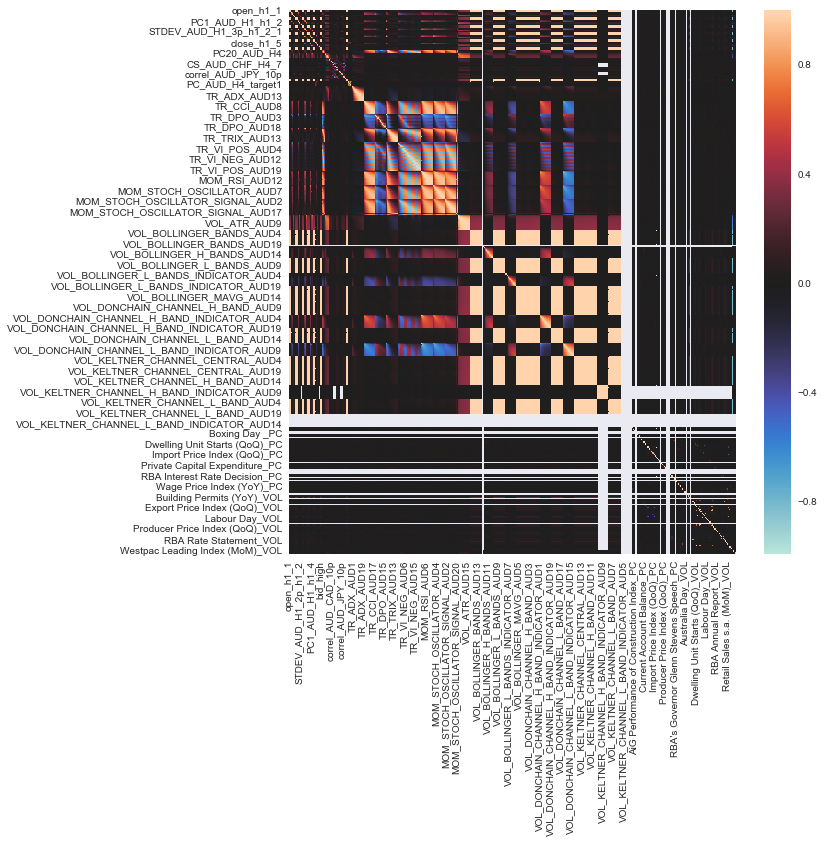

In [29]:
import seaborn as sns
plt.figure(figsize=(10,10))
#sns.heatmap(df_final.corr(),center=0,annot=True)

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),center=0)

In [30]:
X=X.fillna(0)

In [31]:
df_temp=X.select_dtypes(include=['object'])

In [32]:
obj=df_temp.loc[:, df_temp.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
df_temp[obj.columns]=obj

In [33]:
df_temp=df_temp.replace([np.inf, -np.inf], np.nan)
df_temp=df_temp.fillna(0)
X[df_temp.columns]=df_temp

In [34]:
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [35]:
X.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
0     0.9132     0.9139    0.9110      0.9128        -0.000438   
1     0.9123     0.9126    0.9100      0.9106        -0.001973   
2     0.9114     0.9120    0.9102      0.9116        -0.000110   
3     0.9134     0.9138    0.9123      0.9133        -0.000219   
4     0.9140     0.9148    0.9107      0.9119        -0.002516   

   PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
0        -0.002840        -0.001859              0.000283   
1        -0.003938        -0.004047              0.001273   
2         0.000110         0.000219              0.000071   
3         0.001425         0.002085              0.000141   
4        -0.001752        -0.001752              0.001626   

   STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
0              0.001400               -1.000000               -0.995341   
1              0.001800               -1.000000               -0.952217   
2              0.000100                0.999999               -0.500000   
3              0.000814               -1.000000               -0.999652   
4              0.001179               -1.000000               -0.924025   

   correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
0                     1.0                0.834074                    -1.0   
1                    -1.0               -0.944911                     1.0   
2                    -1.0                0.427121                     1.0   
3                     0.0                0.992434                     1.0   
4                    -1.0               -0.907348                    -1.0   

   correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
0               -0.618590                     1.0                0.870159   
1                0.938652                     1.0                0.973684   
2               -0.569495                     1.0               -0.327327   
3                0.995094                     1.0                0.931231   
4               -0.208949                     1.0                0.948821   

   correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
0                -1.00000               -0.902906          1.000000e+00   
1                -1.00000               -0.886357          4.260000e-06   
2                -0.01097                0.866026          2.320000e-07   
3                -1.00000               -0.999076          1.000000e+00   
4                -1.00000               -0.967150          1.000000e+00   

   CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
0             -0.518650             -1.000000              0.999766   
1              0.983621             -0.000007             -0.394945   
2              0.734060             -1.000000              0.999877   
3              0.968291              1.000000              0.787926   
4              0.976171              1.000000             -0.998090   

   CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
0             -1.000000             -0.992228             -1.000000   
1              0.000004              0.394863              0.000007   
2              1.000000              0.999384             -1.000000   
3              1.000000              0.399872              1.000000   
4             -1.000000              0.632777              1.000000   

   CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
0              0.818462             -1.000000              0.928103   
1              0.980625              0.000004              0.992686   
2             -0.603173              1.000000              0.999145   
3              0.984598              1.000000              0.888852   
4              0.964946              1.000000              0.574837   

   open_h1_2  high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  \
0     0.9129     0.9144    0.9120      0.9143         0.001643  

In [36]:
X.shape

(13604, 863)

In [37]:
X=X.drop(['class_target1','class_target2','class_target3', 'target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target1','PC_AUD_H4_target3'],axis=1)



In [38]:
X['target1']=X['target1']*10000
y=X['target1']
X=X.drop(['target1'],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.seed=0

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=44)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9522, 854) (9522,)
(4082, 854) (4082,)


In [41]:
#clf = linear_model.Lasso(alpha=0)
clf=Lasso()
#clf=LinearRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [42]:
y_pred_train=clf.predict(X_train)

In [43]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean()) 
                   
tr=rmse(y_train, y_pred_train)
te=rmse(y_test, y_pred)                 
print("rms error is train: " + str(tr)) 
print("rms error is test: " + str(te)) 

rms error is train: 28.983839534837273
rms error is test: 29.401537003242712


In [44]:
Lasso_train_score = clf.score(X_train,y_train)
Lasso_train_score

0.9994337101051307

In [45]:
yhat=clf.predict(X_train)
SS_Residual=sum((y_train-yhat)**2)
SS_Total=sum((y_train-np.mean(y_train))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.9994337101051307 0.9993779109162282


In [46]:
yhat=clf.predict(X_test)
SS_Residual=sum((y_test-yhat)**2)
SS_Total=sum((y_test-np.mean(y_test))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.9994147914055481 0.9992599205844568


In [47]:
coef_dict = {}
for coef, feat in zip(clf.coef_, X.columns):
    coef_dict[feat] = coef


In [48]:
li_neg=[k for k,v in coef_dict.items() if v<0]
neg_df=X[li_neg]
neg_df.head()

correl_AUD_JPY_2p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_CHF_2p_h1_1  \
0                     1.0                     1.0                -1.00000   
1                    -1.0                     1.0                -1.00000   
2                    -1.0                     1.0                -0.01097   
3                     0.0                     1.0                -1.00000   
4                    -1.0                     1.0                -1.00000   

   correl_AUD_CHF_2p_h1_2  correl_AUD_JPY_2p_h1_2_1  correl_AUD_CHF_2p_h1_2_1  \
0                    -1.0                  1.000000                 -1.000000   
1                    -1.0                 -1.000000                 -1.000000   
2                     1.0                  1.000000                  1.000000   
3                     1.0                 -0.023204                -95.030377   
4                    -1.0                 -1.000000                 -1.000000   

   CS_AUD_EUR_H1_2_h1_2_1  correl_AUD_JPY_2p_h1_4  correl_AUD_EUR_2p_h1_4  \
0                    -1.0                    -1.0                     1.0   
1                     1.0                     1.0                    -1.0   
2                     1.0                     1.0                     1.0   
3                     1.0                     1.0                    -1.0   
4                     1.0                     1.0                     1.0   

   CS_AUD_JPY_H1_2_h1_4  correl_AUD_JPY_2p_h1_5  CS_AUD_EUR_H1_2_h1_5  \
0                   1.0                    -1.0              0.000007   
1                  -1.0                    -1.0             -1.000000   
2                   1.0                     0.0              1.000000   
3                  -1.0                    -1.0              1.000000   
4                  -1.0                     1.0              1.000000   

   TR_ADX_AUD2  TR_ADX_AUD16  TR_CCI_AUD9  TR_CCI_AUD15  TR_CCI_AUD16  \
0     0.000000           0.0          0.0           0.0           0.0   
1     0.000000           0.0          0.0           0.0           0.0   
2     0.000000           0.0          0.0           0.0           0.0   
3    14.880952           0.0          0.0           0.0           0.0   
4    42.371983           0.0          0.0           0.0           0.0   

   MOM_RSI_AUD2  MOM_STOCH_OSCILLATOR_AUD2  MOM_STOCH_OSCILLATOR_SIGNAL_AUD1  \
0     50.000000                  50.000000                         50.000000   
1      0.000000                  42.857143                         50.000000   
2     88.524590                  93.750000                         66.408269   
3     94.354839                  97.560976                         87.222222   
4     94.354839                  83.333333                         90.000000   

   MOM_STOCH_OSCILLATOR_SIGNAL_AUD5  MOM_STOCH_OSCILLATOR_SIGNAL_AUD6  \
0                         50.000000                              50.0   
1                         50.000000                              50.0   
2                         50.000000                              50.0   
3                         50.000000                              50.0   
4                         60.846561                              50.0   

   MOM_STOCH_OSCILLATOR_SIGNAL_AUD7  MOM_STOCH_OSCILLATOR_SIGNAL_AUD8  \
0                              50.0                              50.0   
1                              50.0                              50.0   
2                              50.0                              50.0   
3                              50.0                              50.0   
4                              50.0                              50.0   

   MOM_STOCH_OSCILLATOR_SIGNAL_AUD17  MOM_STOCH_OSCILLATOR_SIGNAL_AUD18  \
0                               50.0                               50.0   
1                               50.0                               50.0   
2                               50.0                               50.0   
3                               50.0                 

In [49]:
li_pos=[k for k,v in coef_dict.items() if v>0]
pos_df=X[li_pos]
pos_df.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  correl_AUD_CAD_2p_h1_1  \
0     0.9132     0.9139    0.9110      0.9128               -1.000000   
1     0.9123     0.9126    0.9100      0.9106               -1.000000   
2     0.9114     0.9120    0.9102      0.9116                0.999999   
3     0.9134     0.9138    0.9123      0.9133               -1.000000   
4     0.9140     0.9148    0.9107      0.9119               -1.000000   

   correl_AUD_GBP_2p_h1_1  open_h1_2  high_h1_2  low_h1_2  close_h1_2  \
0                    -1.0     0.9129     0.9144    0.9120      0.9143   
1                     1.0     0.9106     0.9115    0.9090      0.9114   
2                     1.0     0.9116     0.9125    0.9105      0.9114   
3                     1.0     0.9133     0.9141    0.9130      0.9135   
4                    -1.0     0.9119     0.9131    0.9097      0.9128   

   correl_AUD_CAD_2p_h1_2  correl_AUD_JPY_2p_h1_2  correl_AUD_EUR_2p_h1_2  \
0                    -1.0                1.000000                     1.0   
1                    -1.0                1.000000                     1.0   
2                    -1.0                1.000000                    -1.0   
3                     1.0                1.000000                    -1.0   
4                    -1.0               -0.003913                     1.0   

   CS_AUD_CAD_H1_2_h1_2  open_h1_2_1  high_h1_2_1  low_h1_2_1  close_h1_2_1  \
0          1.000000e+00       0.9143       0.9153      0.9121        0.9142   
1          1.000000e+00       0.9114       0.9124      0.9110        0.9115   
2          1.000000e+00       0.9114       0.9122      0.9104        0.9120   
3          1.910000e-08       0.9134       0.9143      0.9133        0.9135   
4          1.000000e+00       0.9125       0.9140      0.9118        0.9138   

   correl_AUD_GBP_2p_h1_2_1  correl_AUD_EUR_2p_h1_2_1  \
0                  1.000000                  1.000000   
1                 -1.000000                 -1.000000   
2                 -1.000000                 -1.000000   
3                  0.001674              -7215.045631   
4                  1.000000                  1.000000   

   correl_AUD_CHF_3p_h1_2_1  open_h1_4  high_h1_4  low_h1_4  \
0                  0.270409     0.9140     0.9144    0.9120   
1                 -0.964860     0.9116     0.9125    0.9113   
2                  0.986912     0.9122     0.9138    0.9118   
3                  1.000000     0.9137     0.9143    0.9126   
4                 -0.929308     0.9136     0.9151    0.9134   

   correl_AUD_GBP_2p_h1_4  correl_AUD_CHF_2p_h1_4  CS_AUD_JPY_H1_3_h1_4  \
0                     1.0                    -1.0             -0.827613   
1                    -1.0                     1.0              0.967174   
2                     1.0                    -1.0              0.963368   
3                    -1.0                    -1.0              0.130975   
4                    -1.0                    -1.0             -0.854634   

   CS_AUD_EUR_H1_2_h1_4  CS_AUD_CHF_H1_2_h1_4  high_h1_5  low_h1_5  \
0                  -1.0                  -1.0     0.9126    0.9100   
1                   0.0                  -1.0     0.9120    0.9102   
2                   1.0                   1.0     0.9138    0.9123   
3                   1.0                   1.0     0.9148    0.9107   
4                  -1.0                  -1.0     0.9146    0.9125   

   close_h1_5  correl_AUD_CAD_2p_h1_5  correl_AUD_EUR_2p_h1_5  \
0      0.9106               -1.000000                     1.0   
1      0.9116                0.999999                     1.0   
2      0.9133               -1.000000                     1.0   
3      0.9119               -1.000000                     1.0   
4      0.9144               -1.000000                    -1.0   

   correl_AUD_CHF_2p_h1_5  CS_AUD_CHF_H1_2_h1_5  PC50_AUD_H4  TR_ADX_AUD3  \
0                -1.00000              0.000004          0.0          0.0   
1                -0.01097              1.000000 

#####  data modelling avg

In [50]:
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(neg_df, y, test_size=0.3,random_state=44)

In [51]:
clf_neg=Ridge()
#clf=LinearRegression()
clf_neg.fit(X_train_neg,y_train_neg)
y_pred_neg=clf_neg.predict(X_test_neg)

In [52]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(pos_df, y, test_size=0.3,random_state=44)

In [53]:
clf_pos=Ridge()
#clf=LinearRegression()
clf_pos.fit(X_train_pos,y_train_pos)
y_pred_pos=clf_pos.predict(X_test_pos)

In [54]:
y_test1=pd.DataFrame(y_test_pos)
y_pred1=pd.DataFrame(y_pred_neg)
y_pred2=pd.DataFrame(y_pred_pos)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred_neg']
y_pred2.columns=['y_pred_pos']
y_pred1.index=y_test1.index
y_pred2.index=y_test1.index
df_fin=pd.concat([X_test,y_test1,y_pred1,y_pred2],axis=1)

In [55]:
df_fin.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
348       0.9035     0.9056    0.9029      0.9033         0.000000   
11700     0.7609     0.7610    0.7604      0.7609         0.000131   
11682     0.7597     0.7597    0.7583      0.7590        -0.000395   
5140      1.0248     1.0252    1.0233      1.0247         0.000293   
13029     0.7526     0.7531    0.7513      0.7523        -0.000399   

       PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
348          -0.002319        -0.003310          1.280000e-08   
11700        -0.000919        -0.000788          7.070000e-05   
11682        -0.002497        -0.002235          2.121320e-04   
5140         -0.000585        -0.002045          2.121320e-04   
13029        -0.000664        -0.001990          2.121320e-04   

       STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
348                0.001212                0.000623               -0.999190   
11700              0.000436               -1.000003               -0.957186   
11682              0.001021                1.000000                0.473876   
5140               0.000458               -1.000000               -0.675845   
13029              0.000252               -1.000000               -0.917663   

       correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
348                 -0.001179                0.765222               -0.000646   
11700                0.999997               -0.397359                0.999996   
11682                1.000000               -0.606015                1.000000   
5140                -1.000000                0.510033               -1.000000   
13029                1.000000                0.881895                1.000000   

       correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
348                 -0.636285               -0.001437               -0.609994   
11700                0.997176               -1.000005               -0.596039   
11682               -0.866025               -1.000001               -0.999218   
5140                -0.991750                0.000000               -0.944911   
13029                0.847898                1.000000                0.993399   

       correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
348                 -0.000282                0.661143                   1.0   
11700                1.000006               -0.901127                   1.0   
11682               -1.000000                0.580040                  -1.0   
5140                 1.000000               -0.654653                  -1.0   
13029                1.000001               -0.262189                   1.0   

       CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
348                0.816668                  -1.0             -0.917736   
11700             -0.998412                  -1.0             -1.000000   
11682             -0.989697                   1.0              0.980612   
5140               0.384224                  -1.0             -0.813885   
13029             -0.970957                   1.0              0.379174   

       CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
348                    -1.0              0.159399                  -1.0   
11700                   1.0             -0.935272                   0.0   
11682                   1.0              0.853065                   1.0   
5140                    1.0             -0.140464                   1.0   
13029                  -1.0             -0.208917                   0.0   

       CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
348               -0.505257             -1.000000              0.043846   
11700             -0.363006              1.000000             -0.870292   
11682              0.993499              1.000000              0.964595   
5140               0.999358              0.000389              0.9957

In [56]:
df_fin['final_pred']=(df_fin['y_pred_pos']+df_fin['y_pred_neg'])/2

In [57]:
df_plot=df_fin.copy()

In [60]:
#df_plot['diff']=abs(df_plot['y_test']-df_plot['final_pred'])
#df_plot['diff_bid_close']=abs(df_plot['y_test']-df_plot['bid_close']*10000)
#sorted_df=df_plot.sort_values(by='diff',ascending=False)
#sorted_df.head()

In [63]:
  
df_plot['PCT_DIFF_Pred']= (df_plot['final_pred']  - (df_plot['bid_close'] * 10000 )) / (df_plot['bid_close'] * 10000  )
df_plot['PCT_DIFF_Target']= (df_plot['y_test'] - (df_plot['bid_close'] * 10000)  ) / (df_plot['bid_close'] * 10000  )
df_plot.loc[df_plot['PCT_DIFF_Target'] < - 0.0005, 'class_target1'] = -1
df_plot.loc[df_plot['PCT_DIFF_Target'] > 0.0005, 'class_target1'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Target'] >= - 0.0005 ) &  (df_plot['PCT_DIFF_Target'] <= 0.0005 ), 'class_target1'] = 0  
df_plot.loc[df_plot['PCT_DIFF_Pred'] < - 0.0005, 'class_target1_pred'] = -1
df_plot.loc[df_plot['PCT_DIFF_Pred'] > 0.0005, 'class_target1_pred'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Pred'] >= - 0.0005) &  (df_plot['PCT_DIFF_Pred'] <= 0.0005 ) , 'class_target1_pred'] = 0 
 


In [64]:
df_plot.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
348       0.9035     0.9056    0.9029      0.9033         0.000000   
11700     0.7609     0.7610    0.7604      0.7609         0.000131   
11682     0.7597     0.7597    0.7583      0.7590        -0.000395   
5140      1.0248     1.0252    1.0233      1.0247         0.000293   
13029     0.7526     0.7531    0.7513      0.7523        -0.000399   

       PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
348          -0.002319        -0.003310          1.280000e-08   
11700        -0.000919        -0.000788          7.070000e-05   
11682        -0.002497        -0.002235          2.121320e-04   
5140         -0.000585        -0.002045          2.121320e-04   
13029        -0.000664        -0.001990          2.121320e-04   

       STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
348                0.001212                0.000623               -0.999190   
11700              0.000436               -1.000003               -0.957186   
11682              0.001021                1.000000                0.473876   
5140               0.000458               -1.000000               -0.675845   
13029              0.000252               -1.000000               -0.917663   

       correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
348                 -0.001179                0.765222               -0.000646   
11700                0.999997               -0.397359                0.999996   
11682                1.000000               -0.606015                1.000000   
5140                -1.000000                0.510033               -1.000000   
13029                1.000000                0.881895                1.000000   

       correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
348                 -0.636285               -0.001437               -0.609994   
11700                0.997176               -1.000005               -0.596039   
11682               -0.866025               -1.000001               -0.999218   
5140                -0.991750                0.000000               -0.944911   
13029                0.847898                1.000000                0.993399   

       correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
348                 -0.000282                0.661143                   1.0   
11700                1.000006               -0.901127                   1.0   
11682               -1.000000                0.580040                  -1.0   
5140                 1.000000               -0.654653                  -1.0   
13029                1.000001               -0.262189                   1.0   

       CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
348                0.816668                  -1.0             -0.917736   
11700             -0.998412                  -1.0             -1.000000   
11682             -0.989697                   1.0              0.980612   
5140               0.384224                  -1.0             -0.813885   
13029             -0.970957                   1.0              0.379174   

       CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
348                    -1.0              0.159399                  -1.0   
11700                   1.0             -0.935272                   0.0   
11682                   1.0              0.853065                   1.0   
5140                    1.0             -0.140464                   1.0   
13029                  -1.0             -0.208917                   0.0   

       CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
348               -0.505257             -1.000000              0.043846   
11700             -0.363006              1.000000             -0.870292   
11682              0.993499              1.000000              0.964595   
5140               0.999358              0.000389              0.9957

In [ ]:
  
df_plot['PCT_DIFF_Pred']= (df_plot['y_pred']  - (df_plot['bid_close'] * 10000 )) / (df_plot['bid_close'] * 10000  )
df_plot['PCT_DIFF_Target']= (df_plot['y_test'] - (df_plot['bid_close'] * 10000)  ) / (df_plot['bid_close'] * 10000  )
df_plot.loc[df_plot['PCT_DIFF_Target'] < - 0.0005, 'class_target1'] = -1
df_plot.loc[df_plot['PCT_DIFF_Target'] > 0.0005, 'class_target1'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Target'] >= - 0.0005 ) &  (df_plot['PCT_DIFF_Target'] <= 0.0005 ), 'class_target1'] = 0  
df_plot.loc[df_plot['PCT_DIFF_Pred'] < - 0.0005, 'class_target1_pred'] = -1
df_plot.loc[df_plot['PCT_DIFF_Pred'] > 0.0005, 'class_target1_pred'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Pred'] >= - 0.0005) &  (df_plot['PCT_DIFF_Pred'] <= 0.0005 ) , 'class_target1_pred'] = 0 
 


In [65]:
pd.crosstab(df_plot['class_target1'],df_plot['class_target1_pred'])

class_target1_pred  -1.0   0.0   1.0
class_target1                       
-1.0                 934    13   698
 0.0                 465     7   307
 1.0                 875    22   761

In [59]:
te=rmse(df_fin['y_test'], df_fin['final_pred'])                 

print("rms error is test: " + str(te))

rms error is test: 352.80348624175974


In [60]:
r2_score(df_fin['y_test'], df_fin['final_pred'])

0.9157371075322505

##### Stacking

In [66]:
y_pred_pos=clf_pos.predict(pos_df)
y_pred_neg=clf_neg.predict(neg_df)

In [67]:
li_all=[k for k,v in coef_dict.items() if v!=0]
df_all=X[li_all]

In [68]:
df_all['pred_pos']=y_pred_pos
df_all['pred_neg']=y_pred_neg

In [69]:
df_all.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  correl_AUD_CAD_2p_h1_1  \
0     0.9132     0.9139    0.9110      0.9128               -1.000000   
1     0.9123     0.9126    0.9100      0.9106               -1.000000   
2     0.9114     0.9120    0.9102      0.9116                0.999999   
3     0.9134     0.9138    0.9123      0.9133               -1.000000   
4     0.9140     0.9148    0.9107      0.9119               -1.000000   

   correl_AUD_JPY_2p_h1_1  correl_AUD_GBP_2p_h1_1  correl_AUD_EUR_2p_h1_1  \
0                     1.0                    -1.0                     1.0   
1                    -1.0                     1.0                     1.0   
2                    -1.0                     1.0                     1.0   
3                     0.0                     1.0                     1.0   
4                    -1.0                    -1.0                     1.0   

   correl_AUD_CHF_2p_h1_1  open_h1_2  high_h1_2  low_h1_2  close_h1_2  \
0                -1.00000     0.9129     0.9144    0.9120      0.9143   
1                -1.00000     0.9106     0.9115    0.9090      0.9114   
2                -0.01097     0.9116     0.9125    0.9105      0.9114   
3                -1.00000     0.9133     0.9141    0.9130      0.9135   
4                -1.00000     0.9119     0.9131    0.9097      0.9128   

   correl_AUD_CAD_2p_h1_2  correl_AUD_JPY_2p_h1_2  correl_AUD_EUR_2p_h1_2  \
0                    -1.0                1.000000                     1.0   
1                    -1.0                1.000000                     1.0   
2                    -1.0                1.000000                    -1.0   
3                     1.0                1.000000                    -1.0   
4                    -1.0               -0.003913                     1.0   

   correl_AUD_CHF_2p_h1_2  CS_AUD_CAD_H1_2_h1_2  open_h1_2_1  high_h1_2_1  \
0                    -1.0          1.000000e+00       0.9143       0.9153   
1                    -1.0          1.000000e+00       0.9114       0.9124   
2                     1.0          1.000000e+00       0.9114       0.9122   
3                     1.0          1.910000e-08       0.9134       0.9143   
4                    -1.0          1.000000e+00       0.9125       0.9140   

   low_h1_2_1  close_h1_2_1  correl_AUD_JPY_2p_h1_2_1  \
0      0.9121        0.9142                  1.000000   
1      0.9110        0.9115                 -1.000000   
2      0.9104        0.9120                  1.000000   
3      0.9133        0.9135                 -0.023204   
4      0.9118        0.9138                 -1.000000   

   correl_AUD_GBP_2p_h1_2_1  correl_AUD_EUR_2p_h1_2_1  \
0                  1.000000                  1.000000   
1                 -1.000000                 -1.000000   
2                 -1.000000                 -1.000000   
3                  0.001674              -7215.045631   
4                  1.000000                  1.000000   

   correl_AUD_CHF_2p_h1_2_1  correl_AUD_CHF_3p_h1_2_1  CS_AUD_EUR_H1_2_h1_2_1  \
0                 -1.000000                  0.270409                    -1.0   
1                 -1.000000                 -0.964860                     1.0   
2                  1.000000                  0.986912                     1.0   
3                -95.030377                  1.000000                     1.0   
4                 -1.000000                 -0.929308                     1.0   

   open_h1_4  high_h1_4  low_h1_4  correl_AUD_JPY_2p_h1_4  \
0     0.9140     0.9144    0.9120                    -1.0   
1     0.9116     0.9125    0.9113                     1.0   
2     0.9122     0.9138    0.9118                     1.0   
3     0.9137     0.9143    0.9126                     1.0   
4     0.9136     0.9151    0.9134                     1.0   

   correl_AUD_GBP_2p_h1_4  correl_AUD_EUR_2p_h1_4  correl_AUD_CHF_2p_h1_4  \
0                     1.0                     1.0                    -1.0   
1                    -1.0                 

In [77]:
df_all['bid_close']=df['bid_close']

In [78]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all, y, test_size=0.3,random_state=44)
clf=Ridge()
clf.fit(X_train_all,y_train_all)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
y_pred_all=clf.predict(X_test_all)

In [80]:
te=rmse(y_test_all,y_pred_all)                 

print("rms error is test: " + str(te))

rms error is test: 24.610658209777448


In [81]:
r2_score(y_test_all,y_pred_all)

0.9995899686292794

In [82]:
y_test1=pd.DataFrame(y_test_all)
y_pred1=pd.DataFrame(y_pred_all)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']
y_pred1.index=y_test1.index
df_plot_all=pd.concat([X_test_all,y_test1,y_pred1],axis=1)

In [83]:
df_plot_all['diff']=abs(df_plot_all['y_test']-df_plot_all['y_pred'])
#df_plot_all['diff_bid_close']=abs(df_plot_all['y_test']-df_plot_all['bid_close']*10000)
sorted_df_all=df_plot_all.sort_values(by='diff',ascending=False)
sorted_df_all.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  correl_AUD_CAD_2p_h1_1  \
7780     0.8163     0.8180    0.8156      0.8170                     1.0   
2674     1.0026     1.0040    0.9978      1.0017                     0.0   
646      0.8440     0.8469    0.8433      0.8463                    -1.0   
7862     0.8181     0.8207    0.8176      0.8205                    -1.0   
2851     1.0300     1.0351    1.0292      1.0334                    -1.0   

      correl_AUD_JPY_2p_h1_1  correl_AUD_GBP_2p_h1_1  correl_AUD_EUR_2p_h1_1  \
7780                     1.0                     0.0                     1.0   
2674                     1.0                    -1.0                     1.0   
646                      1.0                     1.0                     1.0   
7862                    -1.0                     0.0                     1.0   
2851                    -1.0                     1.0                     1.0   

      correl_AUD_CHF_2p_h1_1  open_h1_2  high_h1_2  low_h1_2  close_h1_2  \
7780                1.000001     0.8166     0.8177    0.8166      0.8170   
2674                1.000000     1.0016     1.0023    0.9952      0.9957   
646                -1.000000     0.8460     0.8473    0.8452      0.8464   
7862               -1.000000     0.8205     0.8217    0.8199      0.8213   
2851               -1.000000     1.0338     1.0359    1.0319      1.0336   

      correl_AUD_CAD_2p_h1_2  correl_AUD_JPY_2p_h1_2  correl_AUD_EUR_2p_h1_2  \
7780                     0.0                0.130832             3009683.294   
2674                    -1.0                1.000000                   1.000   
646                      1.0                0.999998                   1.000   
7862                    -1.0               -1.000000                   1.000   
2851                    -1.0                1.000000                  -1.000   

      correl_AUD_CHF_2p_h1_2  CS_AUD_CAD_H1_2_h1_2  open_h1_2_1  high_h1_2_1  \
7780                0.000000                   1.0       0.8174       0.8177   
2674               -1.000000                   1.0       0.9956       0.9976   
646                 0.999998                   1.0       0.8464       0.8477   
7862                1.000000                   1.0       0.8214       0.8218   
2851                1.000000                   1.0       1.0338       1.0347   

      low_h1_2_1  close_h1_2_1  correl_AUD_JPY_2p_h1_2_1  \
7780      0.8170        0.8171                  1.000002   
2674      0.9924        0.9937                  1.000000   
646       0.8460        0.8464                  0.000000   
7862      0.8199        0.8216                 -0.999999   
2851      1.0324        1.0346                 -1.000000   

      correl_AUD_GBP_2p_h1_2_1  correl_AUD_EUR_2p_h1_2_1  \
7780                  0.000000                  1.000000   
2674                  1.000000                  1.000000   
646                   0.000000                 -0.003332   
7862                 -0.999998                  1.000000   
2851                  1.000000                  1.000000   

      correl_AUD_CHF_2p_h1_2_1  correl_AUD_CHF_3p_h1_2_1  \
7780                 -0.999996                 -0.999997   
2674                 -1.000000                 -0.999751   
646                  -0.003176                 -0.359211   
7862                 -1.000000                 -0.089538   
2851                 -1.000000                  0.318722   

      CS_AUD_EUR_H1_2_h1_2_1  open_h1_4  high_h1_4  low_h1_4  \
7780                     1.0     0.8174     0.8183    0.8169   
2674                     1.0     0.9937     0.9938    0.9874   
646                     -1.0     0.8465     0.8469    0.8451   
7862                    -1.0     0.8215     0.8228    0.8210   
2851                    -1.0     1.0346     1.0349    1.0326   

      correl_AUD_JPY_2p_h1_4  correl_AUD_GBP_2p_h1_4  correl_AUD_EUR_2p_h1_4  \
7780                    -1.0                     0.0                     1.0   
2674                 

In [84]:
  
df_plot_all['PCT_DIFF_Pred']= (df_plot_all['y_pred']  - (df_plot_all['bid_close'] * 10000 )) / (df_plot_all['bid_close'] * 10000  )
df_plot_all['PCT_DIFF_Target']= (df_plot_all['y_test'] - (df_plot_all['bid_close'] * 10000)  ) / (df_plot_all['bid_close'] * 10000  )
df_plot_all.loc[df_plot_all['PCT_DIFF_Target'] < - 0.0005, 'class_target1'] = -1
df_plot_all.loc[df_plot_all['PCT_DIFF_Target'] > 0.0005, 'class_target1'] = 1
df_plot_all.loc[(df_plot_all['PCT_DIFF_Target'] >= - 0.0005 ) &  (df_plot_all['PCT_DIFF_Target'] <= 0.0005 ), 'class_target1'] = 0  
df_plot_all.loc[df_plot_all['PCT_DIFF_Pred'] < - 0.0005, 'class_target1_pred'] = -1
df_plot_all.loc[df_plot_all['PCT_DIFF_Pred'] > 0.0005, 'class_target1_pred'] = 1
df_plot_all.loc[(df_plot_all['PCT_DIFF_Pred'] >= - 0.0005) &  (df_plot_all['PCT_DIFF_Pred'] <= 0.0005 ) , 'class_target1_pred'] = 0 
 


In [85]:
pd.crosstab(df_plot_all['class_target1'],df_plot_all['class_target1_pred'])

class_target1_pred  -1.0   0.0   1.0
class_target1                       
-1.0                 335  1133   177
 0.0                 111   560   108
 1.0                 188  1072   398

In [71]:
#sorted_df_outlier=sorted_df.loc[[10146]]
#13127
#6956, 8180, 1180,

In [72]:
#sorted_df_outlier

In [73]:
#sorted_df.describe()

In [74]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [75]:
X_train_1=X_train.values
X_test_1 = X_test.values
train_X = X_train_1[:, :-1]
test_X = X_test_1[:, :-1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [76]:
lstm_model = Sequential()
lstm_model.add(LSTM(7,    input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(train_X, y_train, epochs=10, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/10
9522/9522 [==============================] - 60s 6ms/step - loss: nan
Epoch 2/10
9522/9522 [==============================] - 40s 4ms/step - loss: nan
Epoch 00002: early stopping


In [77]:
y_pred_nn = lstm_model.predict(test_X)
y_train_pred_nn = lstm_model.predict(train_X )
#print("The R2 score on the Train set is:\t{:f}".format(r2_score(y_train, y_train_pred_nn)))
#print("The R2 score on the Test set is:\t{:f}".format(r2_score(y_test, y_pred_nn)))

In [78]:
y_train_pred_nn

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [79]:
y_pred_nn

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [80]:
                   
tr=rmse(y_train, y_train_pred_nn)
te=rmse(y_test, y_pred_nn)                 
print("rms error is train: " + str(tr)) 
print("rms error is test: " + str(te)) 

Exception: Data must be 1-dimensional